## Assignment 1: Feedback and model solution

In this notebook I will provide general feedback on the assignment, followed by a model solution. 

## Feedback

- Everyone submitted working code, congratulations!
- Barring small issues here and there, you have all managed to solve the questions pretty well!
- Almost nobody referenced their sources and the presentation was mostly minimal, with little explanation of the thought process. In the age of AI this aspect is of outmost importance: you have to be able to demonstrate that you understand the assignment and that, if an AI helper was to hallucinate on a more difficult task, you would be able to correct it. This will be particularly important when you start recruiting for jobs and this is what we are trying to teach you in this and courses!
- Emphasis on how you present your work also nicely connects to the other part of the module: try to approach Python assignments using tools you learn there!
- One way to improve presentation is to use Markdown much more (see model solution below). 

## Model solution

In this assignment I am tasked with discussing the notion of a distance for two-dimensional data points and the aim is to test my understanding from the content of the notes from Session 1 & 2. 

### Part 1.1

I have two points `p_i = (x_i,y_i)` and `p_j = (x_j,y_j)` in two dimensional space:

In [1]:
# Define coordinates
x_i, y_i = 2, 3
x_j, y_j = 7, 1

The Euclidean distance formula is

`d_ij = ((x_i-x_j)^2 + (y_i - y_j)^2)^(1/2)`:

In [2]:
# Compute Euclidean distance
distance = ((x_i - x_j)**2 + (y_i - y_j)**2)**(1.0/2.0)

and I can print the resulting as follows:

In [3]:
# Print the result
print(f"The distance between points ({x_i}, {y_i}) and ({x_j}, {y_j}) is {distance:.2f}")

The distance between points (2, 3) and (7, 1) is 5.39


Here to make the printed result nicer I am rounding the displayed distance to two decimal points. I have consulted 

https://stackoverflow.com/questions/5202233/how-to-change-39-54484700000000-to-39-54-and-using-python

to achieve that. Indeed, the full distance has far more decimal points:

In [4]:
distance

5.385164807134504

### Part 1.2

Building on from Part 1.1, I am supposed to wrap the Euclidean distance formula I applied into a function:

In [5]:
def calculate_distance(x_i, y_i, x_j, y_j):
    """Return the Euclidean distance between two 2D points."""
    return ((x_i - x_j)**2.0 + (y_i - y_j)**2.0)**(1.0/2.0)

In particular, I have consulted

https://stackoverflow.com/questions/21930035/how-to-write-help-description-text-for-python-functions

on how to describe functions, allowing a user to check what the function does by invoking:

In [6]:
help(calculate_distance)

Help on function calculate_distance in module __main__:

calculate_distance(x_i, y_i, x_j, y_j)
    Return the Euclidean distance between two 2D points.



The next task is to test the function for four sets of coordinates. I will reuse the ones already defined:

In [7]:
(x_i,y_i,x_j,y_j)

(2, 3, 7, 1)

and define three further sets:

In [8]:
x_11, y_11, x_12, y_12 = 0, 0, 3, 4
x_21, y_21, x_22, y_22 = -1, -1, 1, 1
x_31, y_31, x_32, y_32 = 1, 2, 3, 4

And now I can print the results together:

In [9]:
# Print the result
print(f"The distance between points ({x_i}, {y_i}) and ({x_j}, {y_j}) is {calculate_distance(x_i,y_i,x_j,y_j):.2f}")
print(f"The distance between points ({x_11}, {y_11}) and ({x_12}, {y_12}) is {calculate_distance(x_11,y_11,x_12,y_12):.2f}")
print(f"The distance between points ({x_21}, {y_21}) and ({x_22}, {y_22}) is {calculate_distance(x_21,y_21,x_22,y_22):.2f}")
print(f"The distance between points ({x_31}, {y_31}) and ({x_32}, {y_32}) is {calculate_distance(x_31,y_31,x_32,y_32):.2f}")

The distance between points (2, 3) and (7, 1) is 5.39
The distance between points (0, 0) and (3, 4) is 5.00
The distance between points (-1, -1) and (1, 1) is 2.83
The distance between points (1, 2) and (3, 4) is 2.83


### Part 1.3

In this exercise I am asked to combine together Parts 1.1 and 1.2. To do so, I define a function that takes a function computing a distance and coordinates of two points:

In [10]:
def print_distance(distance_function, x_i, y_i, x_j, y_j):
    """Compute and print distance using a provided distance function."""
    d = distance_function(x_i, y_i, x_j, y_j)
    print(f"Using {distance_function.__name__}, distance between ({x_i},{y_i}) and ({x_j},{y_j}) is {d:.2f}.")

In particular, I consulted

https://stackoverflow.com/questions/251464/how-to-get-a-function-name-as-a-string

to know how to get a function name as a string.

Let's see if it works:

In [11]:
print_distance(calculate_distance, 0, 0, 3, 4)
print_distance(calculate_distance, -2, -3, 4, 1)

Using calculate_distance, distance between (0,0) and (3,4) is 5.00.
Using calculate_distance, distance between (-2,-3) and (4,1) is 7.21.


To check that the function `print_distance` can work with other "distance" functions, I now define a fake distance function:

In [12]:
# Define an alternative (fake) distance function
def fake_distance(x_i, y_i, x_j, y_j):
    return 1

and I now verify that all works as intended:

In [13]:
print_distance(fake_distance, 0, 0, 3, 4)
print_distance(fake_distance, -2, -3, 4, 1)

Using fake_distance, distance between (0,0) and (3,4) is 1.00.
Using fake_distance, distance between (-2,-3) and (4,1) is 1.00.


### Part 1.4

> Note: The presented answer is a bit convoluted, but it is still valid and the value of it is that it documents the thought-process and manages to overcome the difficulty

In the final exercise, I am tasked with combining Parts 1.1-1.3 with the data science library `pandas` and plotting library `matplotlib`. Let's start by importing the libraries:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

and we are given a definition of some data points:

In [15]:
data = {
    "x": [2, 7, 0, 5, -2],
    "y": [3, 1, 0, 5, 4]
}
df = pd.DataFrame(data)
print(df)

   x  y
0  2  3
1  7  1
2  0  0
3  5  5
4 -2  4


If possible, I would like to reuse the `calculate_distance` function defined ealier. Let me first check if it works if I supply it with columns from the data frame:

In [16]:
# I am mixing variables here on purpose:
calculate_distance(df["x"],df["y"],df["y"],df["x"])

0    1.414214
1    8.485281
2    0.000000
3    0.000000
4    8.485281
dtype: float64

It looks like it does, so I can solve this question in a somewhat silly manner by creating a dummy data frame with zeros only:

In [17]:
dummy_data = {
    "zeros": [0, 0, 0, 0, 0],
}
dummy_df = pd.DataFrame(dummy_data)

and simply invoke the following:

In [18]:
df["distance_from_origin"] = calculate_distance(df["x"],df["y"],dummy_df["zeros"],dummy_df["zeros"])

In [19]:
print("\nData with distance_from_origin:")
print(df)


Data with distance_from_origin:
   x  y  distance_from_origin
0  2  3              3.605551
1  7  1              7.071068
2  0  0              0.000000
3  5  5              7.071068
4 -2  4              4.472136


Let me also manually check for the last point whether the computed distance is correct:

In [20]:
calculate_distance(-2,4,0,0)

4.47213595499958

And finally, I now make a scatter plot of all the points:

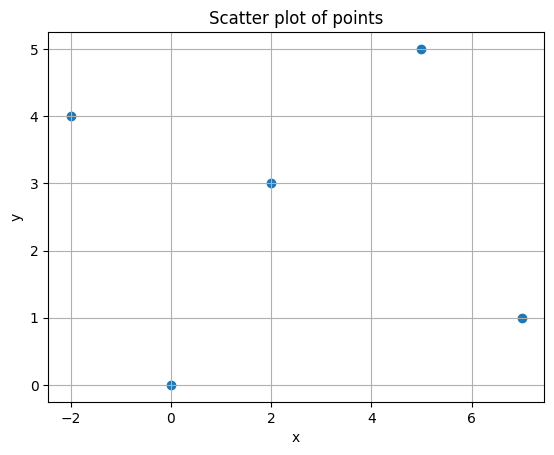

In [21]:
# Scatter plot
plt.scatter(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of points") # adding title
plt.grid(True)
plt.show()

## Summary

In this assignment I worked with distances between points and tested my ability to define variables, functions and working with `pandas` and `matplotlib`. I found the assignment to be quite straight-forward except for the last part, where it was not immediately clear to me how add a new column. In particular, it was a bit of a surprise to me that `distance_function` worked straight away when, instead of providing single values of coordinates, I provided several of them in one-go. 